# Load Dataset

In [1]:
import pandas as pd
# load data
df= pd.read_csv("D:\KULIAH\BERKAS KULIAH\SMT 3\Analisis Data Eksploratif\DATASET\Data Historis Ethereum.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2741 non-null   object
 1   Terakhir    2741 non-null   object
 2   Pembukaan   2741 non-null   object
 3   Tertinggi   2741 non-null   object
 4   Terendah    2741 non-null   object
 5   Vol.        2733 non-null   object
 6   Perubahan%  2741 non-null   object
dtypes: object(7)
memory usage: 150.0+ KB


In [40]:
df.head()

Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah  Perubahan%  \
0 2016-01-07     12.35      12.50      12.58     11.74       -1.20   
1 2016-01-08     11.08      12.00      12.04     11.08       -6.58   
2 2016-01-09     12.22      11.66      12.60     11.61        5.07   
3 2016-01-10     13.18      13.25      13.31     13.05       -0.90   
4 2016-01-11     10.81      10.96      11.21     10.41       -1.37   

   scaled_terakhir  
0         0.001177  
1         0.000912  
2         0.001150  
3         0.001350  
4         0.000856

# Data Preprocesing

In [4]:
df[['Terakhir','Pembukaan','Tertinggi','Terendah']]=df[['Terakhir','Pembukaan','Tertinggi','Terendah']].replace('\.','', regex=True)
df['Perubahan%']=df['Perubahan%'].replace('%','', regex=True)
df[['Terakhir','Pembukaan','Tertinggi','Terendah','Perubahan%']]=df[['Terakhir','Pembukaan','Tertinggi','Terendah','Perubahan%']].replace('\,','.', regex=True)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df[['Terakhir','Pembukaan','Tertinggi','Terendah','Perubahan%']]=df[['Terakhir','Pembukaan','Tertinggi','Terendah','Perubahan%']].astype(float)
df['Tanggal']=pd.to_datetime(df['Tanggal'])
df=df.sort_values(by='Tanggal', ascending=True)
df.reset_index(inplace=True)

In [7]:
df=df.drop(columns=['index'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2741 non-null   datetime64[ns]
 1   Terakhir    2741 non-null   float64       
 2   Pembukaan   2741 non-null   float64       
 3   Tertinggi   2741 non-null   float64       
 4   Terendah    2741 non-null   float64       
 5   Vol.        2733 non-null   object        
 6   Perubahan%  2741 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 150.0+ KB


# Transformasi Data

In [8]:
#duplicates check
df.duplicated().sum()

0

In [9]:
# Missing Value Check
df.isna().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          8
Perubahan%    0
dtype: int64

In [10]:
# Handling missing value
df.drop(columns=['Vol.'], inplace=True)

# Integrasi Data

In [11]:
# Merging dataframe

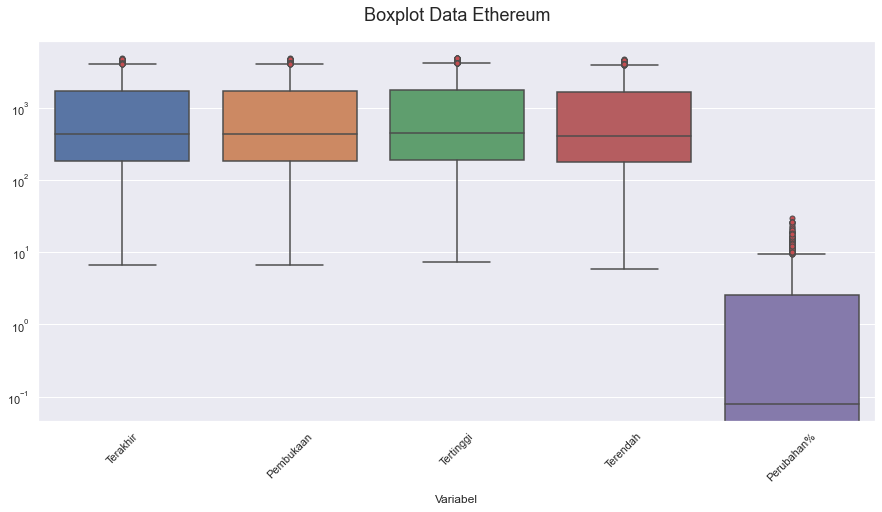

In [12]:
# Deteksi Outlier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot( data=df[['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah','Perubahan%']],
            flierprops={'markerfacecolor':'r','marker':'o'}
           )
plt.semilogy()
plt.title("Boxplot Data Ethereum",fontsize=18,pad=20)
plt.xlabel('Variabel',fontsize=12,labelpad=12)
plt.xticks(rotation=45)
plt.show()

# Statistika Deskriptif

In [13]:
# Descriptive Statistics
df.describe()

Terakhir    Pembukaan    Tertinggi     Terendah   Perubahan%
count  2741.000000  2741.000000  2741.000000  2741.000000  2741.000000
mean   1016.277771  1015.486983  1046.653780   980.841704     0.320620
std    1100.469296  1100.403567  1132.486829  1063.661965     5.215102
min       6.700000     6.680000     7.320000     5.860000   -44.550000
25%     180.650000   180.600000   185.730000   174.940000    -2.050000
50%     429.240000   428.810000   442.020000   407.960000     0.080000
75%    1718.810000  1717.920000  1761.660000  1663.670000     2.520000
max    4808.380000  4808.340000  4864.060000  4715.430000    29.510000

In [72]:
df.skew()

Terakhir           1.217138
Pembukaan          1.218790
Tertinggi          1.217298
Terendah           1.213465
Perubahan%         0.116048
scaled_terakhir    1.217138
change            -1.059317
rsi                     NaN
dtype: float64

In [73]:
df.kurt()

Terakhir            0.720990
Pembukaan           0.725115
Tertinggi           0.711325
Terendah            0.711599
Perubahan%          5.845404
scaled_terakhir     0.720990
change             27.938544
rsi                      NaN
dtype: float64

# Visualisasi Data

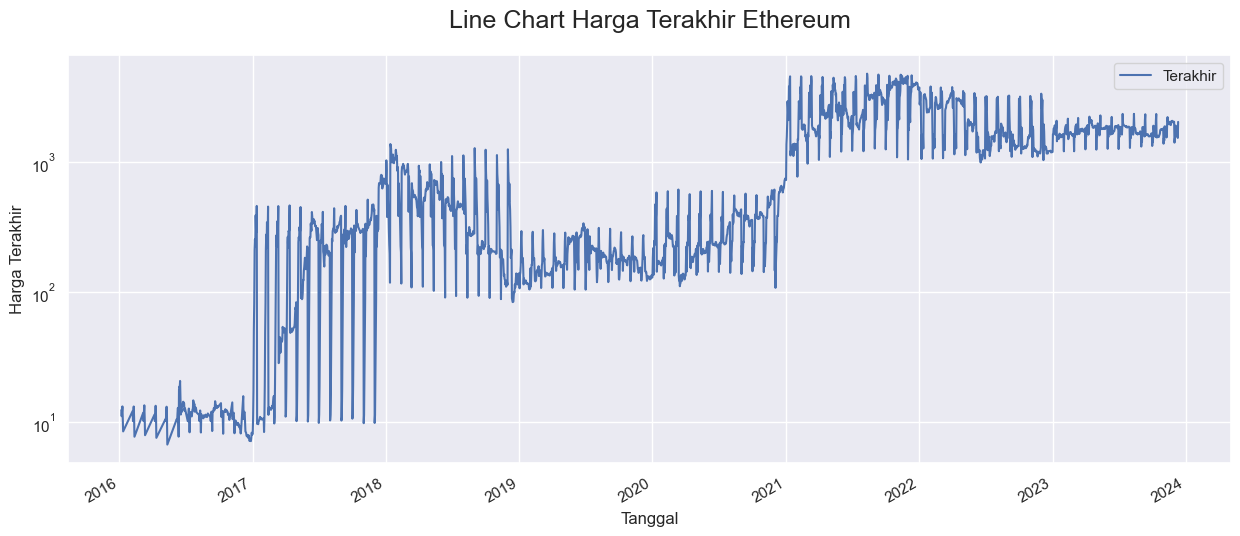

In [14]:
plt.rcParams['figure.figsize'] = (15,6)
plt.rcParams['figure.dpi'] = 100
df.plot(x='Tanggal', y= 'Terakhir', linewidth=1.5)
plt.yscale('log')
plt.ylabel("Harga Terakhir")
plt.title("Line Chart Harga Terakhir Ethereum",fontsize=18,pad=20)
plt.show()

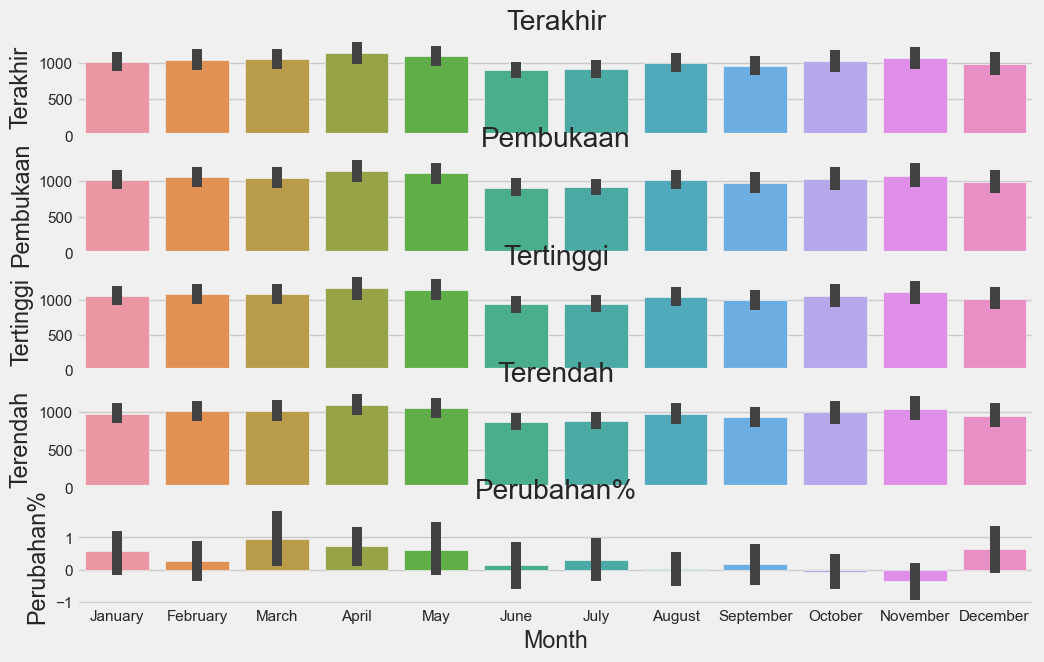

In [76]:
df['Month'] = df.index.strftime('%B')
fig, axes = plt.subplots(5, 1, figsize=(11, 7), sharex=True)
for name, ax in zip(['Terakhir', 'Pembukaan', 'Tertinggi','Terendah', 'Perubahan%'], axes):
    sns.barplot(data=df, x='Month', y=name, ax=ax)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')


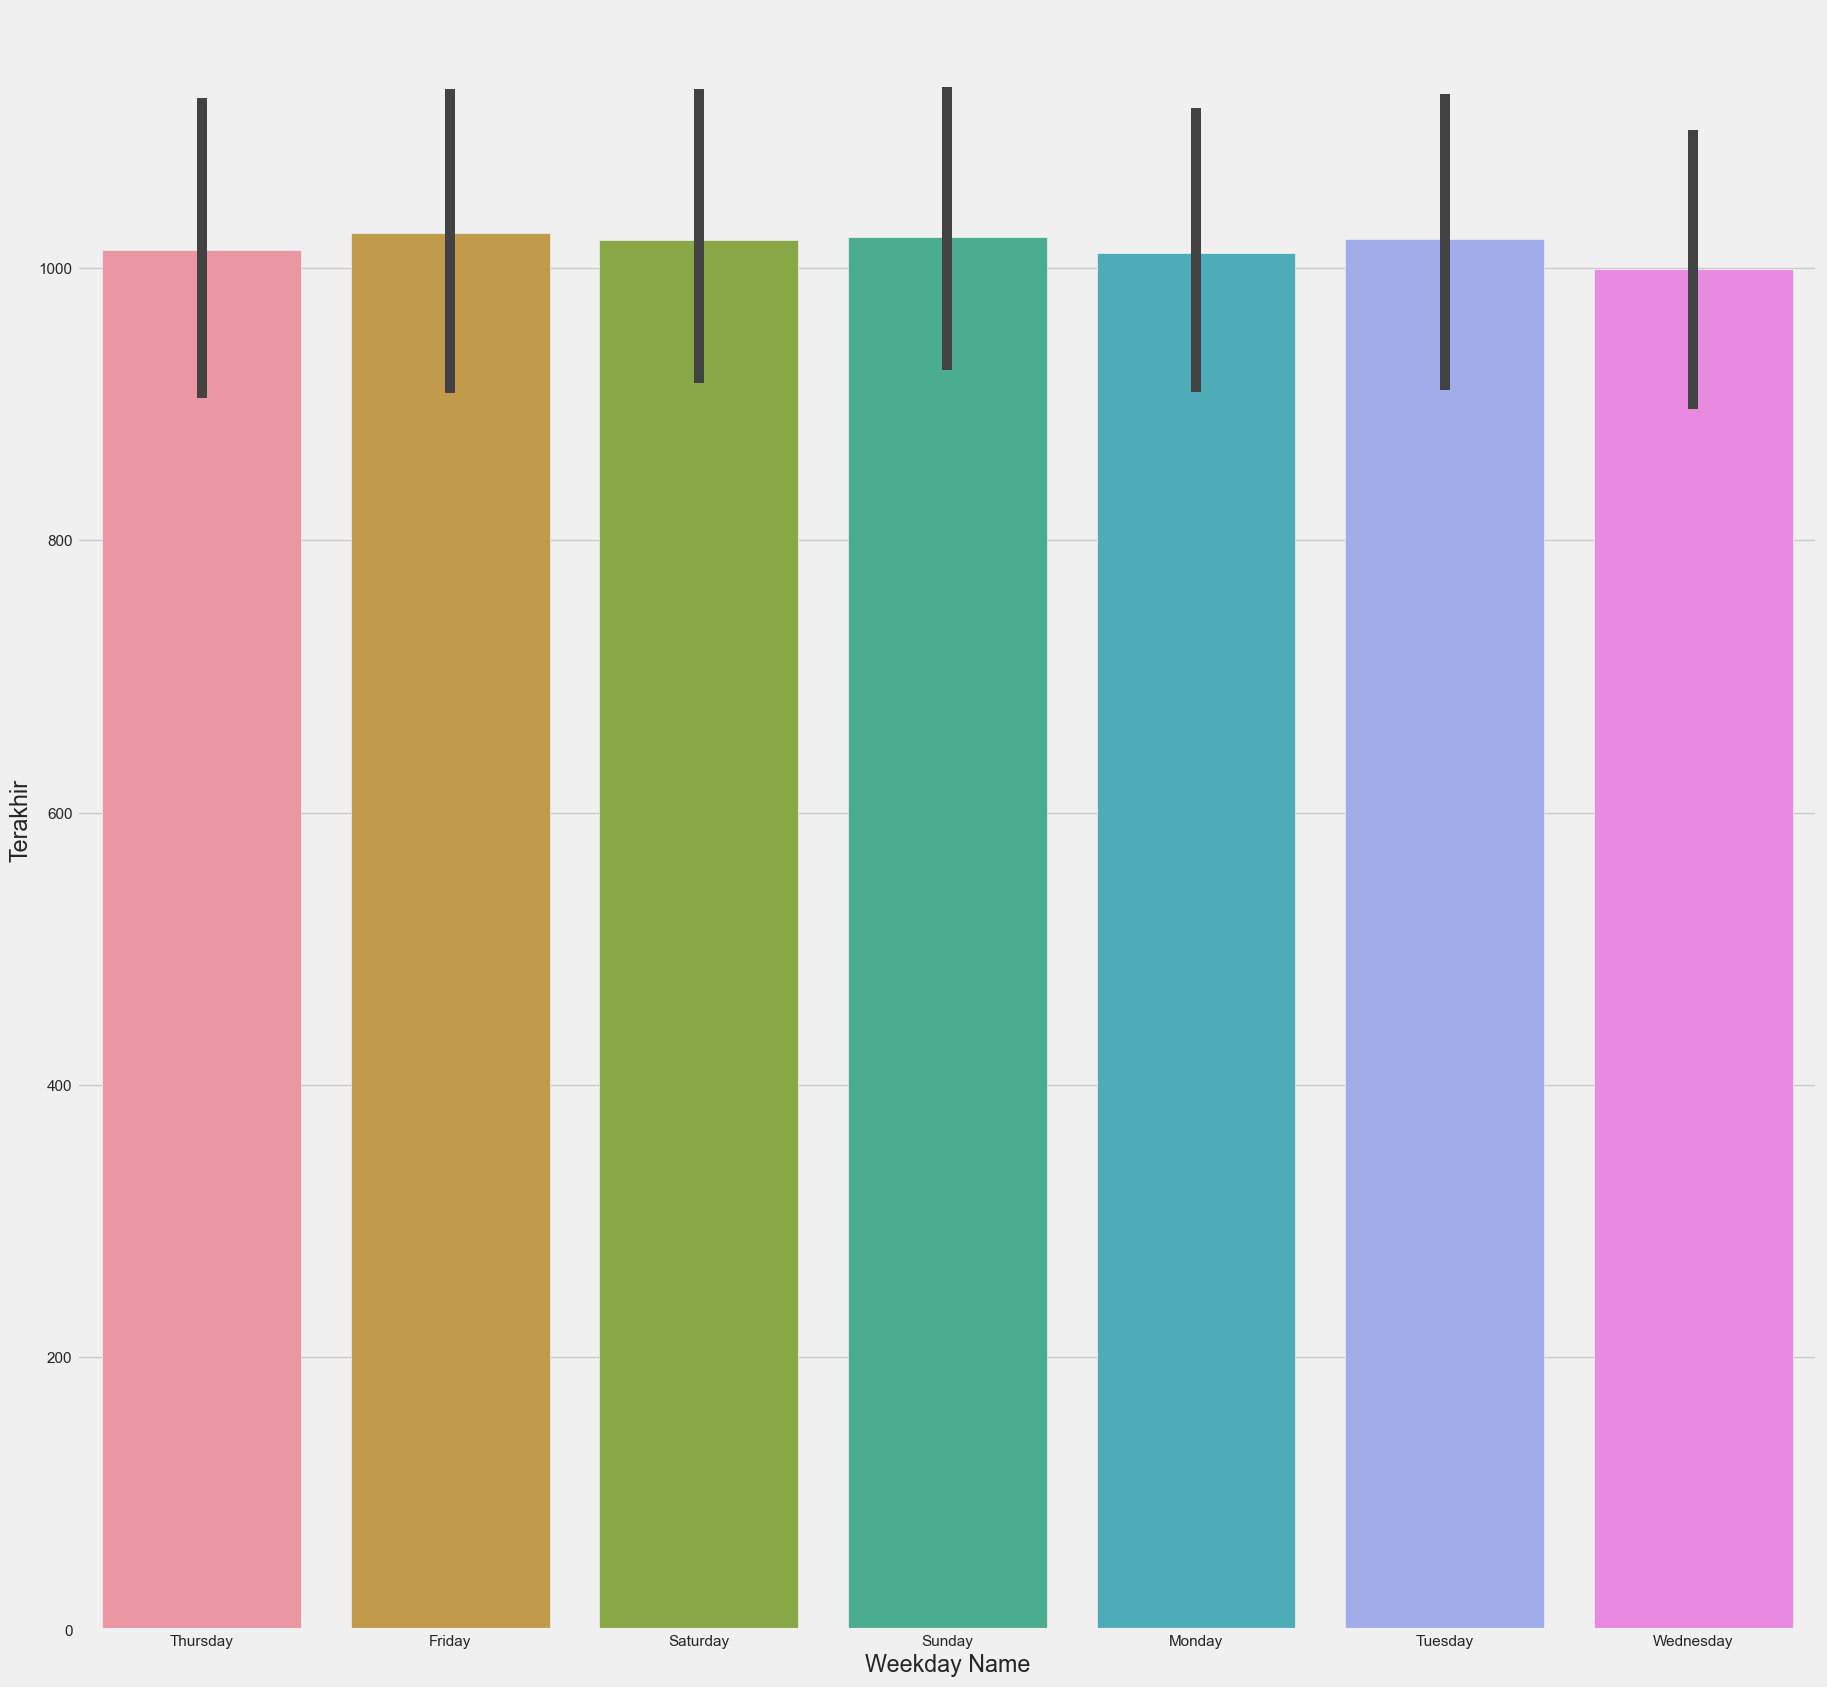

In [80]:
df['Weekday Name'] = df.index.strftime('%A')
plt.figsize=(5, 3)
sns.barplot(data=df, x='Weekday Name', y='Terakhir',);

# Normalisasi Data

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['Terakhir'].to_numpy().reshape(-1, 1))
df['scaled_terakhir'] = pd.DataFrame(scaled, columns=['Terakhir'])
df.tail()

Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah  Perubahan%  \
2736 2023-12-07   1871.86    1878.33    1901.45   1865.11       -0.34   
2737 2023-12-08   1849.94    1848.88    1853.54   1846.13        0.06   
2738 2023-12-09   1592.50    1551.89    1617.39   1549.71        2.62   
2739 2023-12-10   1539.70    1566.88    1568.47   1523.78       -1.73   
2740 2023-12-11   2044.61    2053.40    2065.35   2020.76       -0.43   

      scaled_terakhir  
2736         0.388439  
2737         0.383874  
2738         0.330259  
2739         0.319263  
2740         0.424416

# Pengujian Hipotesis

In [16]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-Value: ", dftest[1])
    print("3. Num Of Lags: ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation", dftest[3])
    print("5. Critical Values: ")
    for key, val in dftest[4].items():
        print("\t",key,": ", val)

ad_test(df['Terakhir'])

1. ADF:  -1.0084677469393943
2. P-Value:  0.7501633693342911
3. Num Of Lags:  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation 2712
5. Critical Values: 
	 1% :  -3.43276353256931
	 5% :  -2.8626063225123146
	 10% :  -2.5673376385571394


# Analisis Korelasi

In [17]:
df.corr()

Terakhir  Pembukaan  Tertinggi  Terendah  Perubahan%  \
Terakhir         1.000000   0.998084   0.999054  0.999006   -0.004099   
Pembukaan        0.998084   1.000000   0.999275  0.998447   -0.042685   
Tertinggi        0.999054   0.999275   1.000000  0.998217   -0.023974   
Terendah         0.999006   0.998447   0.998217  1.000000   -0.019209   
Perubahan%      -0.004099  -0.042685  -0.023974 -0.019209    1.000000   
scaled_terakhir  1.000000   0.998084   0.999054  0.999006   -0.004099   

                 scaled_terakhir  
Terakhir                1.000000  
Pembukaan               0.998084  
Tertinggi               0.999054  
Terendah                0.999006  
Perubahan%             -0.004099  
scaled_terakhir         1.000000

<AxesSubplot:>

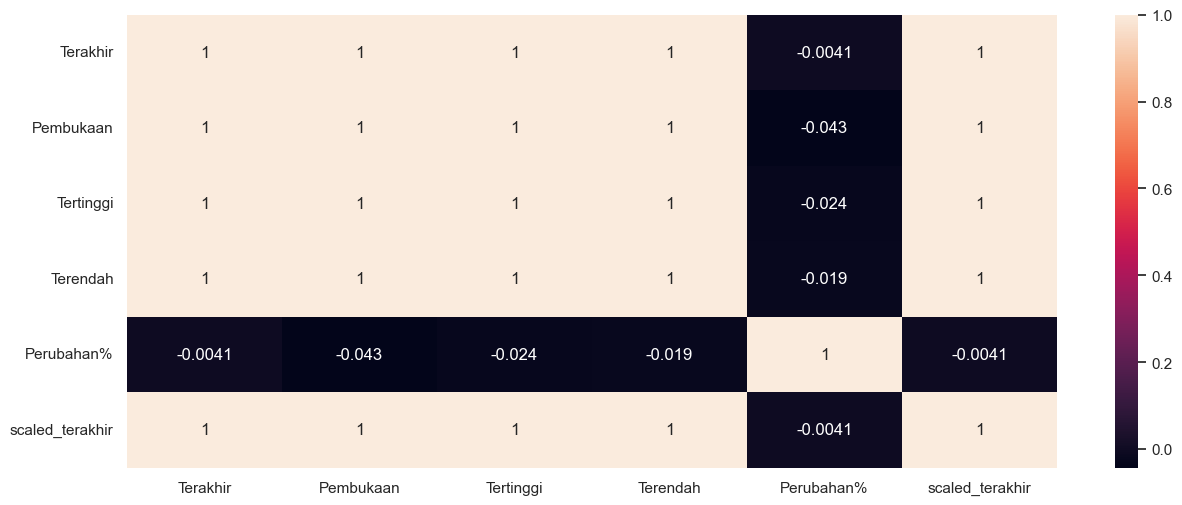

In [18]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

# Splitting Data Train dan Test 

In [19]:
df1= df[['Tanggal','scaled_terakhir']]
df1.columns = ['ds','y']
train, test = df1[:-548], df1[-548:]
print('Banyaknya baris train data:', train.shape[0])
print('Banyaknya baris test data:', test.shape[0])

Banyaknya baris train data: 2193
Banyaknya baris test data: 548


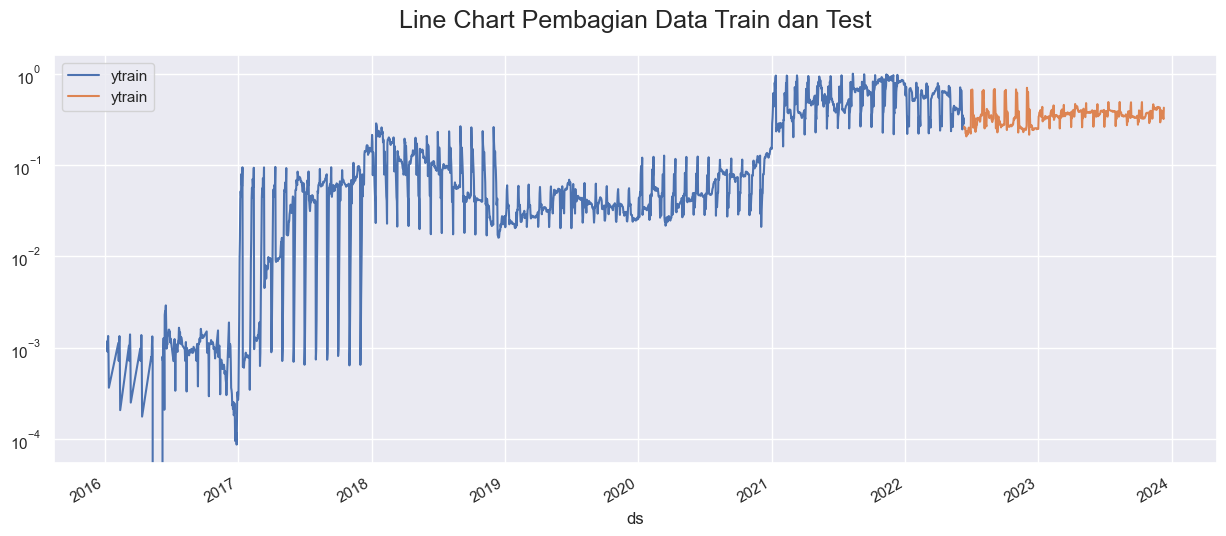

In [20]:
#visualisasi train-test data
fig,ax=plt.subplots()
plt.yscale('log')
train.plot(x='ds', y='y',label="ytrain",ax=ax, legend=True)
test.plot(x='ds', y='y',label="ytrain", ax=ax, legend=True)
plt.title("Line Chart Pembagian Data Train dan Test",fontsize=18,pad=20)
plt.show()

# Pemodelan

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [22]:
m = Prophet()
m.fit(df1)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

15:06:55 - cmdstanpy - INFO - Chain [1] start processing
15:06:57 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future

ds
0    2016-01-07
1    2016-01-08
2    2016-01-09
3    2016-01-10
4    2016-01-11
...         ...
3101 2024-12-06
3102 2024-12-07
3103 2024-12-08
3104 2024-12-09
3105 2024-12-10

[3106 rows x 1 columns]

In [37]:
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-07 -0.040687   -0.131466    0.086266    -0.040687    -0.040687   
1 2016-01-08 -0.040508   -0.150206    0.105906    -0.040508    -0.040508   
2 2016-01-09 -0.040329   -0.143927    0.093025    -0.040329    -0.040329   
3 2016-01-10 -0.040150   -0.139759    0.099330    -0.040150    -0.040150   
4 2016-01-11 -0.039971   -0.147539    0.094568    -0.039971    -0.039971   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.016951              0.016951              0.016951  0.000336   
1        0.018045              0.018045              0.018045  0.001714   
2        0.015679              0.015679              0.015679 -0.000058   
3        0.016210              0.016210              0.016210  0.001350   
4        0.012530              0.012530              0.012530 -0.001207   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.000336      0.000336  0.016615      0.016615      0.016615   
1      0.001714      0.001714  0.016331      0.016331      0.016331   
2     -0.000058     -0.000058  0.015736      0.015736      0.015736   
3      0.001350      0.001350  0.014860      0.014860      0.014860   
4     -0.001207     -0.001207  0.013737      0.013737      0.013737   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0 -0.023736  
1                         0.0 -0.022463  
2                         0.0 -0.024651  
3                         0.0 -0.023940  
4                         0.0 -0.027441

In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3101 2024-12-06  0.296347    0.110393    0.502167
3102 2024-12-07  0.292482    0.109082    0.504940
3103 2024-12-08  0.291961    0.093904    0.490460
3104 2024-12-09  0.287688    0.104763    0.494837
3105 2024-12-10  0.289028    0.092689    0.494509

In [25]:
test

ds         y
2193 2022-06-12  0.263358
2194 2022-06-13  0.249906
2195 2022-06-14  0.250775
2196 2022-06-15  0.256414
2197 2022-06-16  0.221129
...         ...       ...
2736 2023-12-07  0.388439
2737 2023-12-08  0.383874
2738 2023-12-09  0.330259
2739 2023-12-10  0.319263
2740 2023-12-11  0.424416

[548 rows x 2 columns]

In [26]:
train

ds         y
0    2016-01-07  0.001177
1    2016-01-08  0.000912
2    2016-01-09  0.001150
3    2016-01-10  0.001350
4    2016-01-11  0.000856
...         ...       ...
2188 2022-06-07  0.245695
2189 2022-06-08  0.350621
2190 2022-06-09  0.323043
2191 2022-06-10  0.280229
2192 2022-06-11  0.325753

[2193 rows x 2 columns]

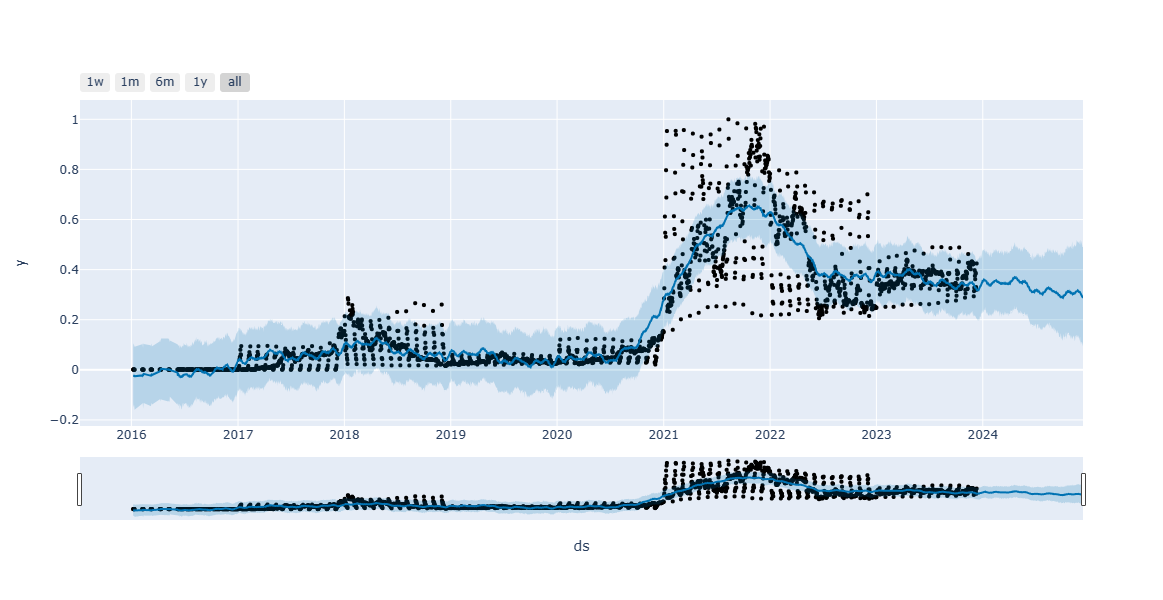

In [27]:
plot_plotly(m, forecast)

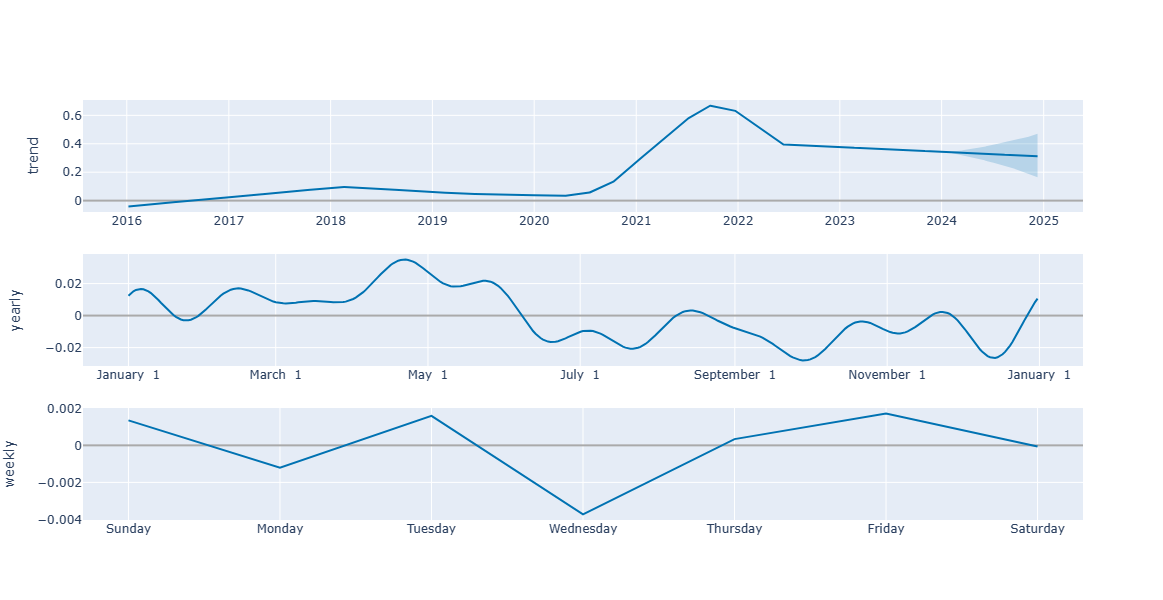

In [28]:
plot_components_plotly(m, forecast)

In [29]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[2193:2741]['yhat']

print('Root Mean Squared Error between actual and predicted values: ', rmse(predictions,test['y']))
print("Mean Value Of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and predicted values:  0.08579428573811615
Mean Value Of Test Dataset: 0.3540104523331669


In [30]:
forecast.iloc[1840:2300]

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1840 2021-06-24  0.564450    0.437607    0.676710     0.564450     0.564450   
1841 2021-06-25  0.565635    0.434948    0.679740     0.565635     0.565635   
1842 2021-06-26  0.566820    0.426940    0.675050     0.566820     0.566820   
1843 2021-06-27  0.568005    0.428701    0.681921     0.568005     0.568005   
1844 2021-06-28  0.569190    0.440565    0.673281     0.569190     0.569190   
...         ...       ...         ...         ...          ...          ...   
2295 2022-09-22  0.385569    0.238746    0.481188     0.385569     0.385569   
2296 2022-09-23  0.385478    0.241325    0.478943     0.385478     0.385478   
2297 2022-09-24  0.385387    0.243067    0.476950     0.385387     0.385387   
2298 2022-09-25  0.385295    0.237008    0.486198     0.385295     0.385295   
2299 2022-09-26  0.385204    0.237831    0.469951     0.385204     0.385204   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
1840       -0.014692             -0.014692             -0.014692  0.000336   
1841       -0.012624             -0.012624             -0.012624  0.001714   
1842       -0.013648             -0.013648             -0.013648 -0.000058   
1843       -0.011469             -0.011469             -0.011469  0.001350   
1844       -0.013266             -0.013266             -0.013266 -0.001207   
...              ...                   ...                   ...       ...   
2295       -0.023575             -0.023575             -0.023575  0.000336   
2296       -0.023187             -0.023187             -0.023187  0.001714   
2297       -0.025853             -0.025853             -0.025853 -0.000058   
2298       -0.025218             -0.025218             -0.025218  0.001350   
2299       -0.028403             -0.028403             -0.028403 -0.001207   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
1840      0.000336      0.000336 -0.015028     -0.015028     -0.015028   
1841      0.001714      0.001714 -0.014338     -0.014338     -0.014338   
1842     -0.000058     -0.000058 -0.013591     -0.013591     -0.013591   
1843      0.001350      0.001350 -0.012820     -0.012820     -0.012820   
1844     -0.001207     -0.001207 -0.012059     -0.012059     -0.012059   
...            ...           ...       ...           ...           ...   
2295      0.000336      0.000336 -0.023911     -0.023911     -0.023911   
2296      0.001714      0.001714 -0.024902     -0.024902     -0.024902   
2297     -0.000058     -0.000058 -0.025795     -0.025795     -0.025795   
2298      0.001350      0.001350 -0.026568     -0.026568     -0.026568   
2299     -0.001207     -0.001207 -0.027197     -0.027197     -0.027197   

      multiplicative_terms  multiplicative_terms_lower  \
1840                   0.0                         0.0   
1841                   0.0                         0.0   
1842                   0.0                         0.0   
1843                   0.0                         0.0   
1844                   0.0                         0.0   
...                    ...                         ...   
2295                   0.0                         0.0   
2296                   0.0                         0.0   
2297                   0.0                         0.0   
2298                   0.0                         0.0   
2299                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
1840                         0.0  0.549758  
1841                         0.0  0.553011  
1842                         0.0  0.553172  
1843                         0.0  0.556535  
1844                         0.0  0.555924  
...                          ...       ...  
2295                         0.0  0.361994  
2296                         0.0  0.362290  
2297                         0.0  0.359534  
2298                         0.0  0.360078  
2299                         0.0  0.356801  



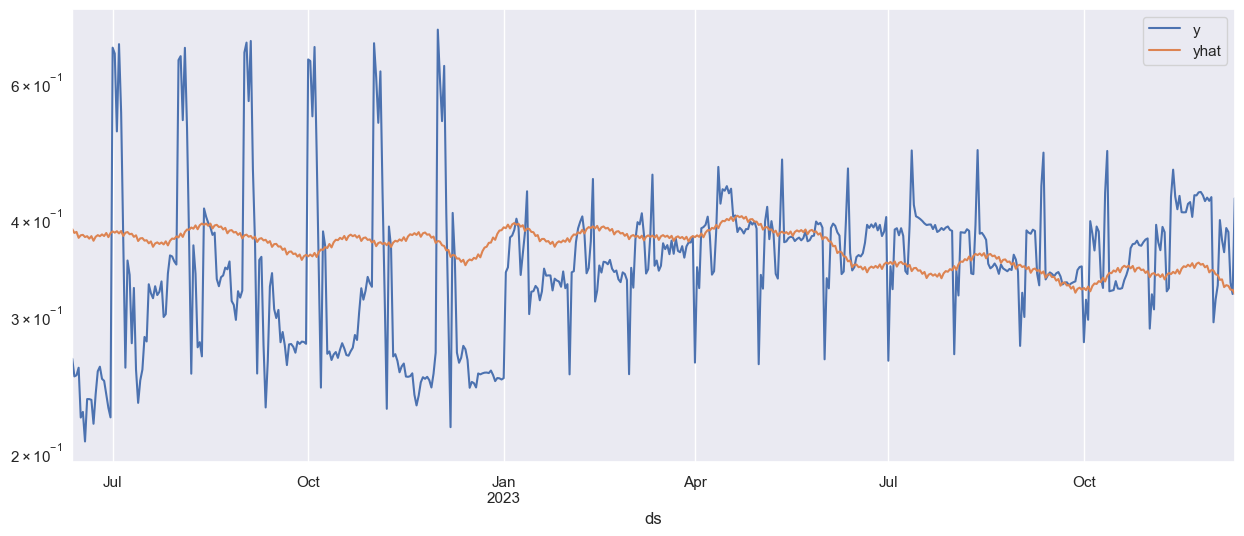

In [31]:
fig,ax=plt.subplots()
test.plot(x='ds', y='y',ax=ax, legend=True)
forecast.iloc[2193:2741].plot(x='ds', y='yhat', ax=ax, legend=True)
plt.yscale('log')

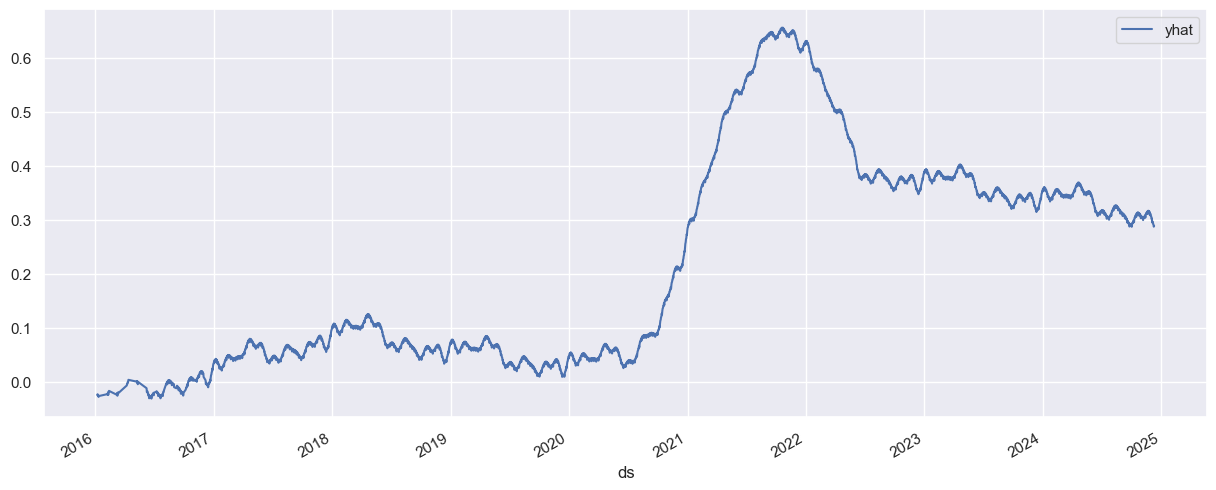

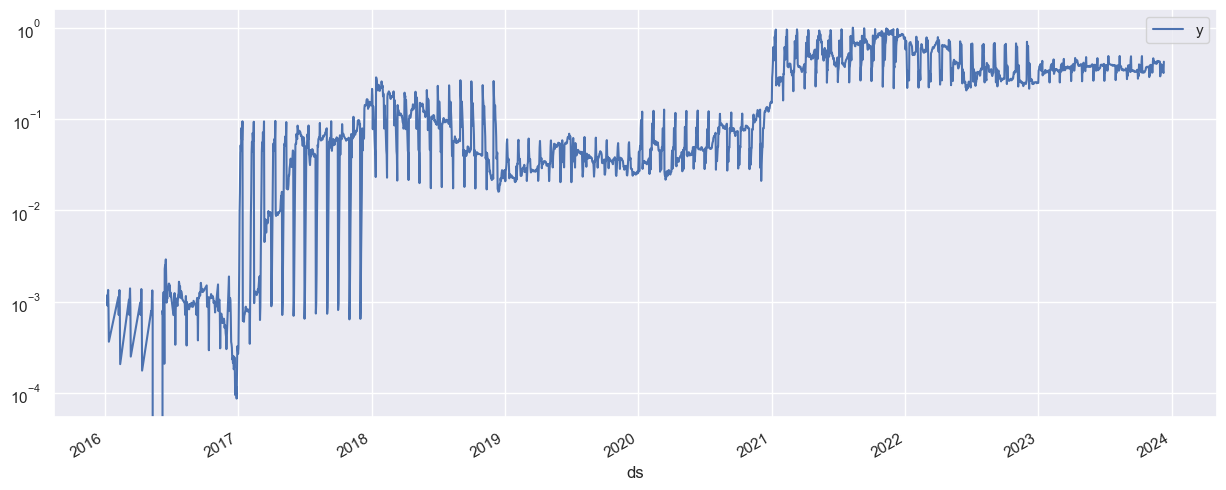

In [32]:
forecast.plot(x='ds',y='yhat')
df1.plot(x='ds',y='y')
plt.yscale('log')

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['y'], predictions)

0.18670432829381253

In [34]:
from sklearn.metrics import r2_score
r2_score(test['y'], predictions)

-0.09646834011246264

In [35]:
from sklearn.metrics import mean_absolute_error

# Menghitung MAE
mean_absolute_error(test['y'], predictions)

0.06181250226051897

In [36]:
from sklearn.metrics import mean_squared_error

# Menghitung MSE
mean_squared_error(test['y'], predictions)

0.007360659465313521

In [42]:
df['change'] = df["Terakhir"].diff()
df['change'].dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = df['change'].copy()
change_down = df['change'].copy()

# 
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
df['change'].equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

df['rsi'] = 100 * avg_up / (avg_up + avg_down)

# Take a look at the 20 oldest datapoints
df['rsi'].head(20)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14    49.428763
15    53.943850
16    47.831633
17    42.098951
18    50.884314
19    52.544910
Name: rsi, dtype: float64

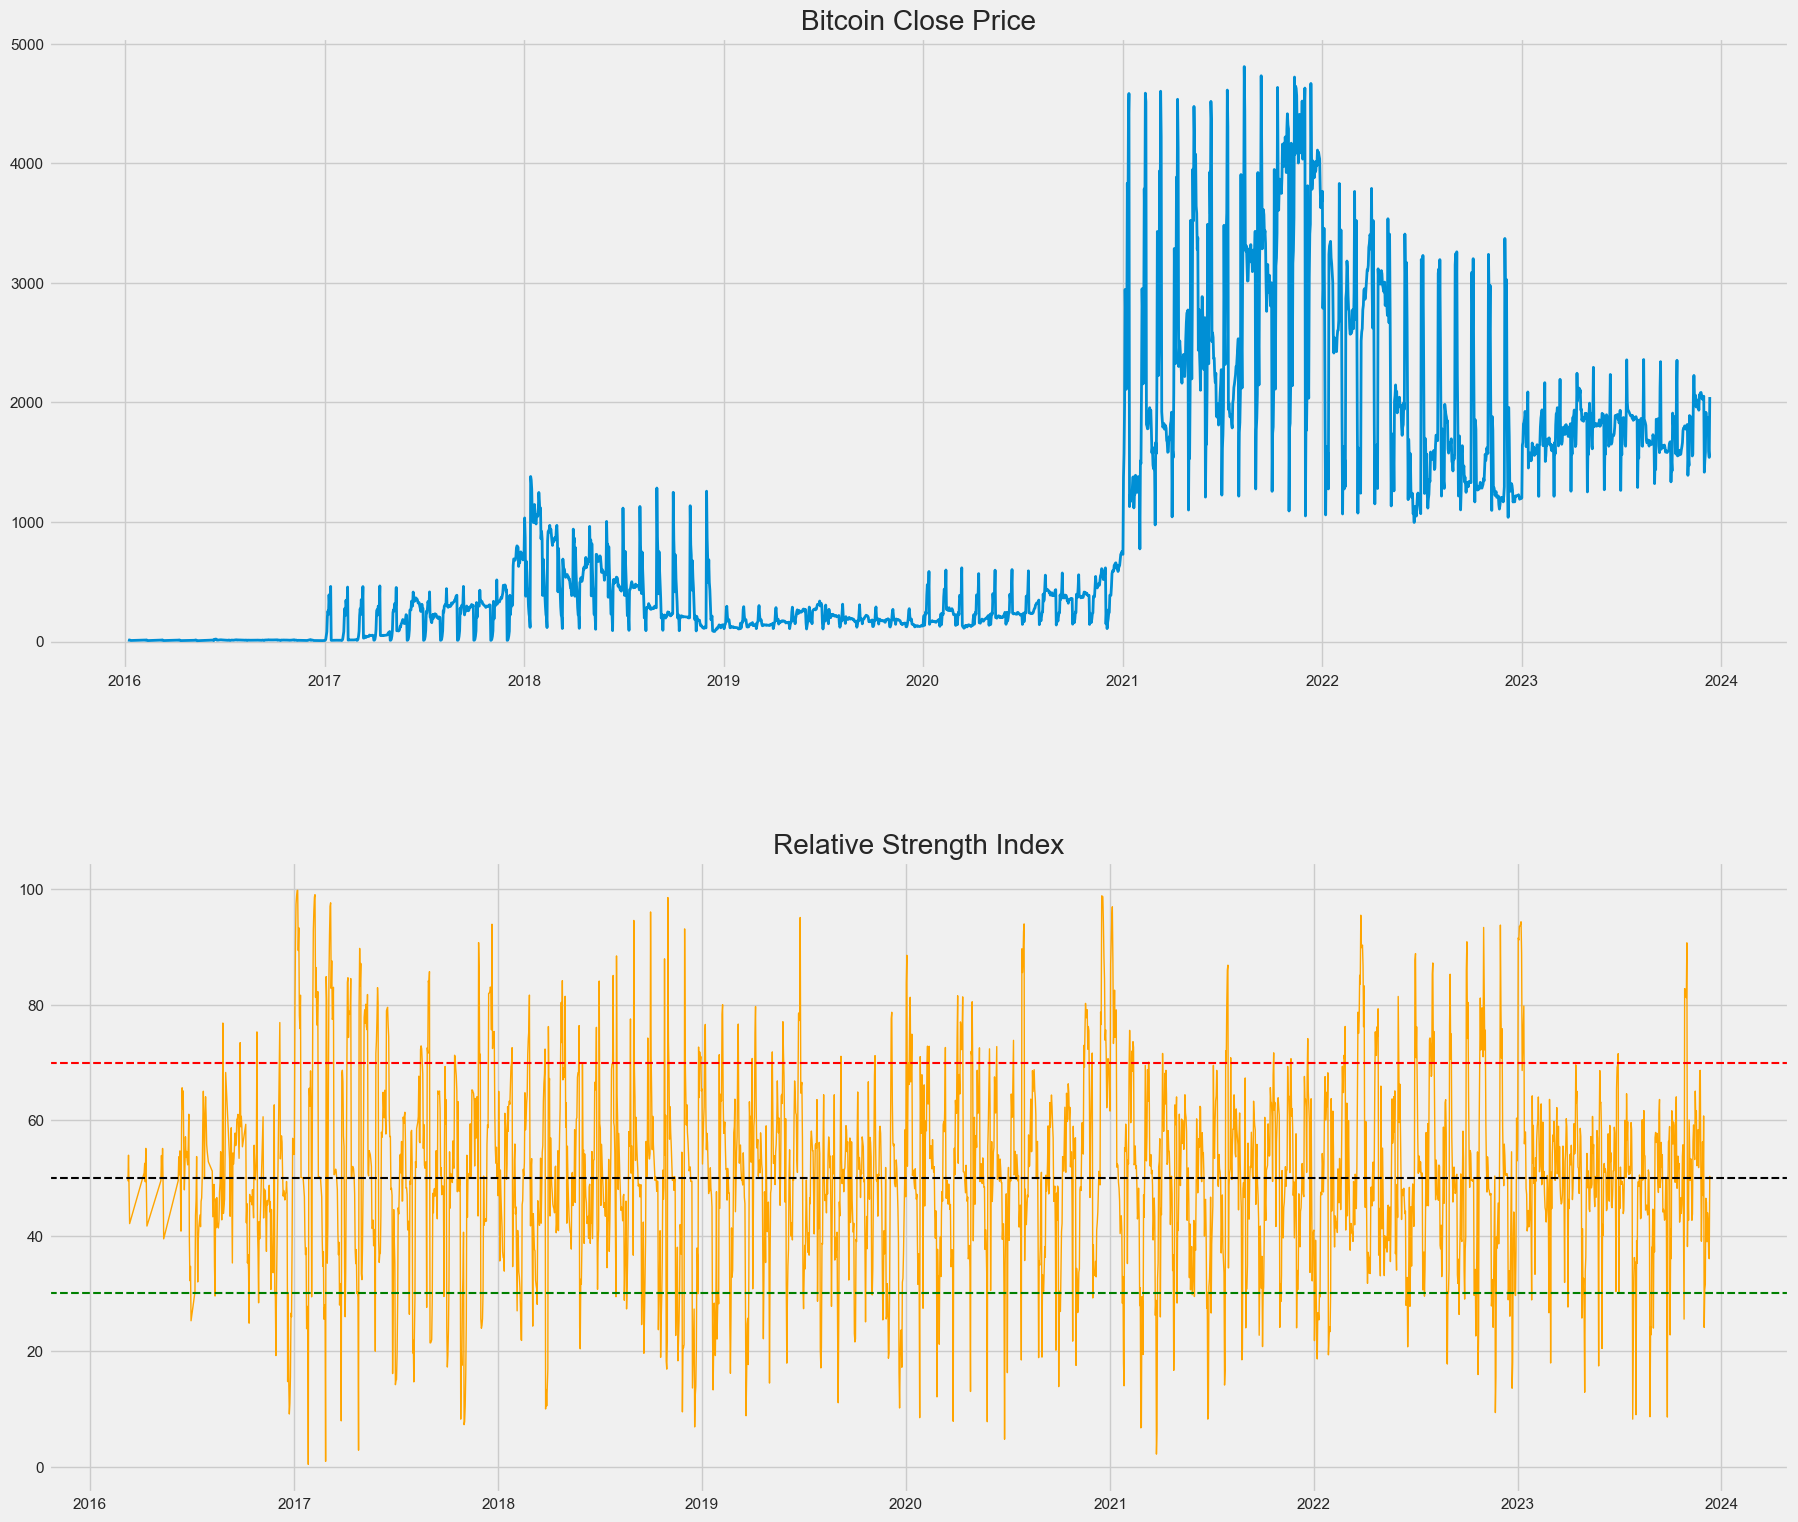

In [46]:
import matplotlib.pyplot as plt
# Mengatur tema
plt.style.use('fivethirtyeight')

# Mengatur ukuran gambar
plt.rcParams['figure.figsize'] = (20, 20)

df=df.set_index(df['Tanggal'])

# Membuat 2 chart dalam satu gambar
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Chart 1
# Plot the closing price on the first chart
ax1.plot(df['Terakhir'], linewidth=2)
ax1.set_title('Bitcoin Close Price')

# Second chart
# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(df['rsi'], color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
#Neutral
ax2.axhline(50, linestyle='--', linewidth=1.5, color='black')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
plt.show()

In [65]:
df2=forecast.iloc[2741:3106]
df2['change'] = forecast['yhat'].diff()
df2['change'].dropna(inplace=True)

# Membuat dua data copies of the Closing price Series
change_up = df2['change'].copy()
change_down = df2['change'].copy()

# Memfilter data perubahan atas dan bawah
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
df2['change'].equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

df2['rsi'] = 100 * avg_up / (avg_up + avg_down)

# Take a look at the 20 oldest datapoints
df2['rsi'].head(20)

2741          NaN
2742          NaN
2743          NaN
2744          NaN
2745          NaN
2746          NaN
2747          NaN
2748          NaN
2749          NaN
2750          NaN
2751          NaN
2752          NaN
2753          NaN
2754    69.513730
2755    72.204907
2756    78.518376
2757    80.052771
2758    81.183132
2759    83.926686
2760    84.429046
Name: rsi, dtype: float64

In [66]:
df2

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2741 2023-12-12  0.344871    0.207161    0.436769     0.344871     0.344871   
2742 2023-12-13  0.344780    0.194903    0.438969     0.344780     0.344780   
2743 2023-12-14  0.344688    0.200480    0.438544     0.344688     0.344688   
2744 2023-12-15  0.344597    0.203935    0.443751     0.344597     0.344597   
2745 2023-12-16  0.344506    0.193528    0.436232     0.344506     0.344506   
...         ...       ...         ...         ...          ...          ...   
3101 2024-12-06  0.312020    0.110393    0.502167     0.167707     0.469352   
3102 2024-12-07  0.311929    0.109082    0.504940     0.167429     0.470083   
3103 2024-12-08  0.311838    0.093904    0.490460     0.166779     0.470778   
3104 2024-12-09  0.311746    0.104763    0.494837     0.166029     0.471435   
3105 2024-12-10  0.311655    0.092689    0.494509     0.165279     0.471287   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2741       -0.023915             -0.023915             -0.023915  0.001591   
2742       -0.029888             -0.029888             -0.029888 -0.003728   
2743       -0.026118             -0.026118             -0.026118  0.000336   
2744       -0.024658             -0.024658             -0.024658  0.001714   
2745       -0.025964             -0.025964             -0.025964 -0.000058   
...              ...                   ...                   ...       ...   
3101       -0.015673             -0.015673             -0.015673  0.001714   
3102       -0.019447             -0.019447             -0.019447 -0.000058   
3103       -0.019877             -0.019877             -0.019877  0.001350   
3104       -0.024058             -0.024058             -0.024058 -0.001207   
3105       -0.022627             -0.022627             -0.022627  0.001591   

      ...  weekly_upper    yearly  yearly_lower  yearly_upper  \
2741  ...      0.001591 -0.025506     -0.025506     -0.025506   
2742  ...     -0.003728 -0.026160     -0.026160     -0.026160   
2743  ...      0.000336 -0.026454     -0.026454     -0.026454   
2744  ...      0.001714 -0.026372     -0.026372     -0.026372   
2745  ...     -0.000058 -0.025907     -0.025907     -0.025907   
...   ...           ...       ...           ...           ...   
3101  ...      0.001714 -0.017387     -0.017387     -0.017387   
3102  ...     -0.000058 -0.019390     -0.019390     -0.019390   
3103  ...      0.001350 -0.021227     -0.021227     -0.021227   
3104  ...     -0.001207 -0.022851     -0.022851     -0.022851   
3105  ...      0.001591 -0.024218     -0.024218     -0.024218   

      multiplicative_terms  multiplicative_terms_lower  \
2741                   0.0                         0.0   
2742                   0.0                         0.0   
2743                   0.0                         0.0   
2744                   0.0                         0.0   
2745                   0.0                         0.0   
...                    ...                         ...   
3101                   0.0                         0.0   
3102                   0.0                         0.0   
3103                   0.0                         0.0   
3104                   0.0                         0.0   
3105                   0.0                         0.0   

      multiplicative_terms_upper      yhat    change        rsi  
2741                         0.0  0.320956  0.001716        NaN  
2742                         0.0  0.314892 -0.006065        NaN  
2743                         0.0  0.318570  0.003679        NaN  
2744                         0.0  0.319939  0.001369        NaN  
2745                         0.0  0.318542 -0.001398        NaN  
...                          ...       ...       ...        ...  
3101                         0.0  0.296347 -0.000830  21.802237  
3102                         0.0  0.292482 -0.003866  20.653810  
3103                         0.0  0.291961 -0.000521  1

In [67]:
forecast.iloc[2741:3106]['yhat']

2741    0.320956
2742    0.314892
2743    0.318570
2744    0.319939
2745    0.318542
          ...   
3101    0.296347
3102    0.292482
3103    0.291961
3104    0.287688
3105    0.289028
Name: yhat, Length: 365, dtype: float64

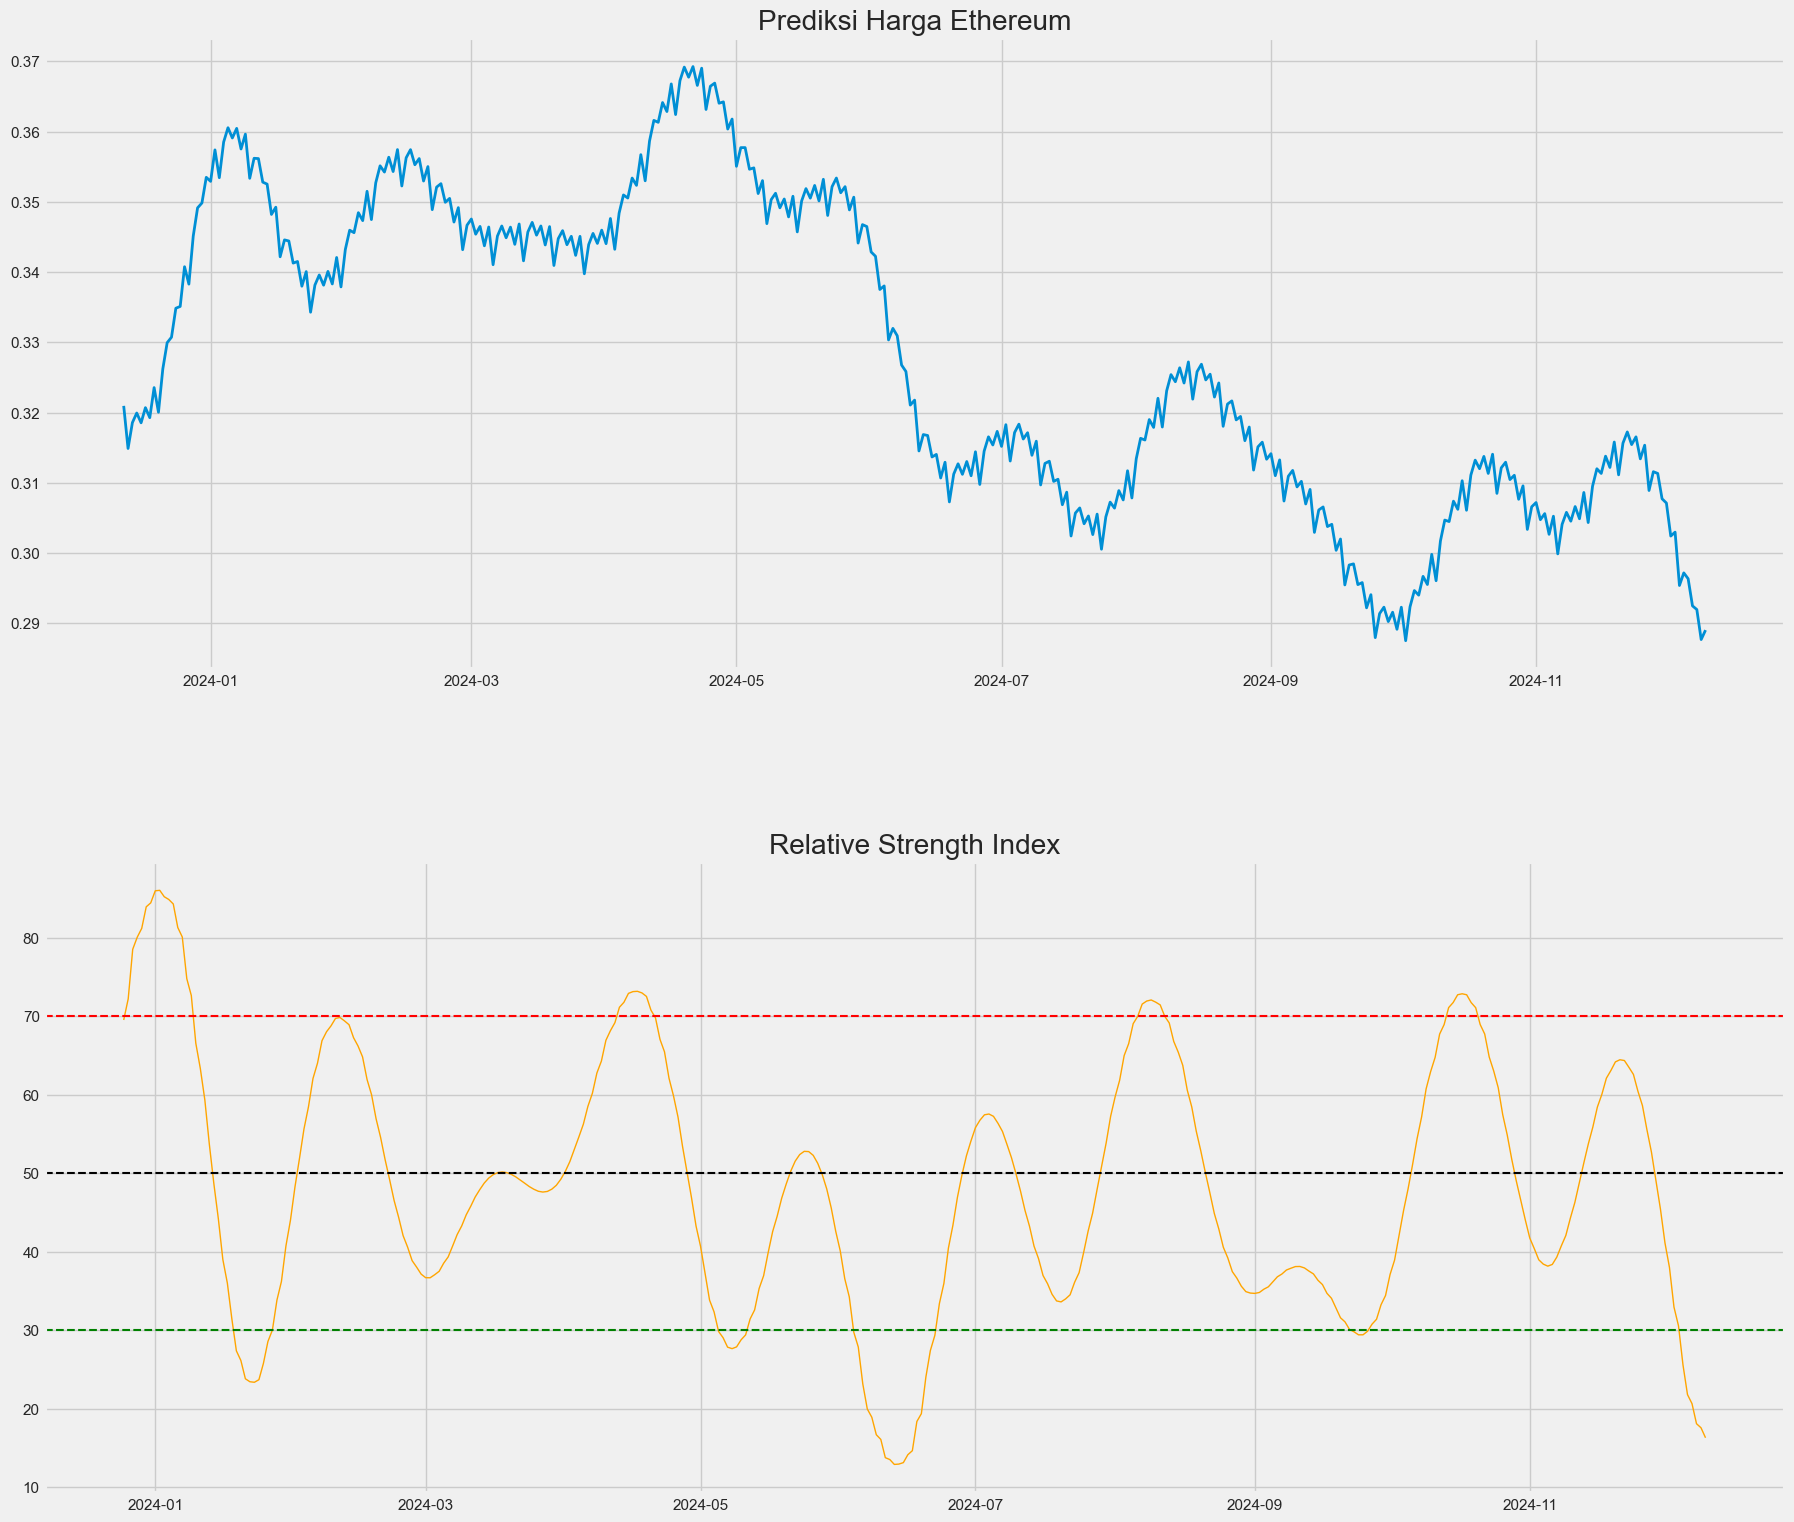

In [71]:
import matplotlib.pyplot as plt
# Mengatur tema
plt.style.use('fivethirtyeight')

# Mengatur ukuran gambar
plt.rcParams['figure.figsize'] = (20, 20)

df2=df2.set_index(df2['ds'])

# Membuat 2 chart dalam satu gambar
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Chart ke-1
# Plot the closing price on the first chart
ax1.plot(df2['yhat'], linewidth=2)
ax1.set_title('Prediksi Harga Ethereum')

# Chart ke-2
# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(df2['rsi'], color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
#Neutral
ax2.axhline(50, linestyle='--', linewidth=1.5, color='black')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
plt.show()

In [69]:
forecast[2741:]

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2741 2023-12-12  0.344871    0.207161    0.436769     0.344871     0.344871   
2742 2023-12-13  0.344780    0.194903    0.438969     0.344780     0.344780   
2743 2023-12-14  0.344688    0.200480    0.438544     0.344688     0.344688   
2744 2023-12-15  0.344597    0.203935    0.443751     0.344597     0.344597   
2745 2023-12-16  0.344506    0.193528    0.436232     0.344506     0.344506   
...         ...       ...         ...         ...          ...          ...   
3101 2024-12-06  0.312020    0.110393    0.502167     0.167707     0.469352   
3102 2024-12-07  0.311929    0.109082    0.504940     0.167429     0.470083   
3103 2024-12-08  0.311838    0.093904    0.490460     0.166779     0.470778   
3104 2024-12-09  0.311746    0.104763    0.494837     0.166029     0.471435   
3105 2024-12-10  0.311655    0.092689    0.494509     0.165279     0.471287   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2741       -0.023915             -0.023915             -0.023915  0.001591   
2742       -0.029888             -0.029888             -0.029888 -0.003728   
2743       -0.026118             -0.026118             -0.026118  0.000336   
2744       -0.024658             -0.024658             -0.024658  0.001714   
2745       -0.025964             -0.025964             -0.025964 -0.000058   
...              ...                   ...                   ...       ...   
3101       -0.015673             -0.015673             -0.015673  0.001714   
3102       -0.019447             -0.019447             -0.019447 -0.000058   
3103       -0.019877             -0.019877             -0.019877  0.001350   
3104       -0.024058             -0.024058             -0.024058 -0.001207   
3105       -0.022627             -0.022627             -0.022627  0.001591   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2741      0.001591      0.001591 -0.025506     -0.025506     -0.025506   
2742     -0.003728     -0.003728 -0.026160     -0.026160     -0.026160   
2743      0.000336      0.000336 -0.026454     -0.026454     -0.026454   
2744      0.001714      0.001714 -0.026372     -0.026372     -0.026372   
2745     -0.000058     -0.000058 -0.025907     -0.025907     -0.025907   
...            ...           ...       ...           ...           ...   
3101      0.001714      0.001714 -0.017387     -0.017387     -0.017387   
3102     -0.000058     -0.000058 -0.019390     -0.019390     -0.019390   
3103      0.001350      0.001350 -0.021227     -0.021227     -0.021227   
3104     -0.001207     -0.001207 -0.022851     -0.022851     -0.022851   
3105      0.001591      0.001591 -0.024218     -0.024218     -0.024218   

      multiplicative_terms  multiplicative_terms_lower  \
2741                   0.0                         0.0   
2742                   0.0                         0.0   
2743                   0.0                         0.0   
2744                   0.0                         0.0   
2745                   0.0                         0.0   
...                    ...                         ...   
3101                   0.0                         0.0   
3102                   0.0                         0.0   
3103                   0.0                         0.0   
3104                   0.0                         0.0   
3105                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
2741                         0.0  0.320956  
2742                         0.0  0.314892  
2743                         0.0  0.318570  
2744                         0.0  0.319939  
2745                         0.0  0.318542  
...                          ...       ...  
3101                         0.0  0.296347  
3102                         0.0  0.292482  
3103                         0.0  0.291961  
3104                         0.0  0.287688  
3105                         0.0  0.289028  

